# Разведочный анализ

**`Цель`**: Изучить распределение целевой переменной, взаимосвязи между переменными

## Оглавление

1. [Изучение целевой переменной](#1)<br>
2. [Изучение взаимосвязей между зависимой переменной и независимыми](#2)<br>
    2.1. [Зависимость стоимости квартиры от ее площади](#2.1)<br>
3. [Исследование стоимости квадратного метра квартиры](#3)<br>
4. [Взаимосвязи между стоимостью квадратного метра и остальными переменными](#4)<br>
    4.1. [Зависимость стоимости квадратного метра от количества комнат](#4.1)<br>
    4.2. [Зависимость стоимости квдратного метра от района](#4.2)<br>
    4.3. [Зависимость стоимости квадратного метра от этажа](#4.3)<br>
5. [Вывод](#5)<br>

In [1]:
# Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')
import pingouin as pg
from scipy.stats import norm
from scipy.stats import spearmanr
plt.rcParams["font.family"] = "Times New Roman"
import statsmodels.api as sm
import matplotlib.ticker as ticker
import matplotlib.ticker as tick
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('etagiFullDataSet.xlsx', index_col=0)

## Изучение целевой переменной <a class="anchor" id="1"></a>

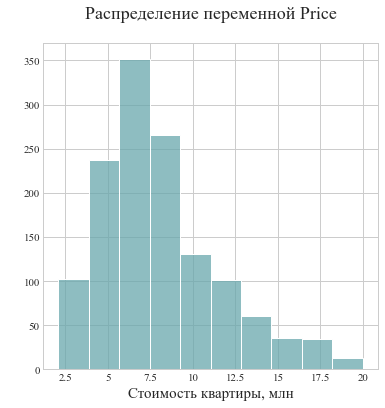

In [22]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.histplot(df['price'], ax=ax, color='#68A7AD',bins=10)
plt.xlabel('Стоимость квартиры, млн', fontsize=15)
plt.ylabel('  ')
plt.title('Распределение переменной Price\n', fontsize=18)
ticks_x = tick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1_000_000))
ax.xaxis.set_major_formatter(ticks_x)

In [5]:
df['price'].describe().reset_index().round()

,index,price
0,count,1331.0
1,mean,8057811.0
2,std,3518306.0
3,min,2100000.0
4,25%,5600000.0
5,50%,7200000.0
6,75%,9800000.0
7,max,19990000.0


Исходя из таблицы можно сделать вывод, что в среднем квартира стоит 8,06 млн, чаще всего встречается цена 7 млн, а 75 % всех квартир стоит 9,8 млн или меньше. Размах стоимости квартир 17,89 млн (от 2,1 млн до 19,99).

In [10]:
df['price'].mode()

0    7000000
dtype: int64

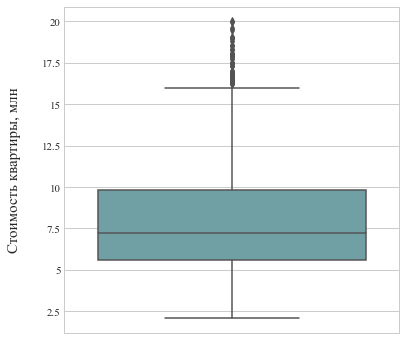

In [11]:
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.boxplot(y = df['price'], color='#68A7AD')
plt.ylabel('Стоимость квартиры, млн\n', fontsize=15)
ticks_x = tick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1_000_000))
ax.yaxis.set_major_formatter(ticks_x)

In [8]:
pg.normality(data=df['price'])

,W,pval,normal
price,0.933251,6.166646e-24,False


Тест Шапиро-Уилка позволяет отклонить нулевую гипотезу, говорящую, что выборка из нормального распределения (на уровне значимости 5%). 

Text(0.5, 1.0, '')

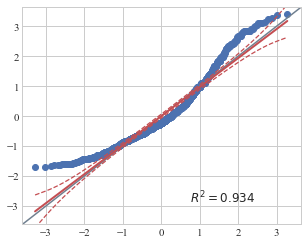

In [9]:
pg.qqplot(df['price'])
plt.xlabel('')
plt.ylabel('')
plt.title('')

На рисунках показано распределение стоимости объектов недвижимости. Из них видно, что целевая переменная не является нормально распределенной.

## Изучение взаимосвязей между зависимой переменной и независимыми <a class="anchor" id="2"></a>


In [16]:
cols = ['rooms', 'area', 'floor', 'lon', 'lat',
       'floors_in_house', 'building_year', 'wall_id', 'euro', 'mortgage',
       'ceiling_height', 'balcon_glass', 'lift', 'wate_heating_system',
       'furniture', 'internet', 'telephon', 'tv', 'regionLabel', 'keepLabel',
       'balconLabel', 'bathLabel', 'districttr_label', 'dist_centr', 'region',
       'districttr']

In [17]:
corr_spear = pd.DataFrame(columns=['Название признака', 'Корреляция', 'p-value'])
for col in cols:
    new_row = {'Название признака':col, 'Корреляция':spearmanr(df[col],df['price'])[0], 'p-value':spearmanr(df[col],df['price'])[1]}
    corr_spear = corr_spear.append(new_row, ignore_index=True)

In [18]:
corr_spear

,Название признака,Корреляция,p-value
0,rooms,0.646072,4.108715e-158
1,area,0.816134,7.814538e-319
2,floor,0.165354,1.289230e-09
3,lon,-0.175877,1.040741e-10
4,lat,0.054522,4.673194e-02
5,floors_in_house,0.192592,1.379022e-12
6,building_year,0.187497,5.377499e-12
7,wall_id,0.030974,2.587957e-01
8,euro,0.208652,1.473156e-14
9,mortgage,0.044365,1.056977e-01


Из таблицы можно сделать вывод, что корреляция целевой переменной – `price` заметная и высокая (corr > 0.5) с такими независимыми переменными как  `rooms` – количество комнат в квартире (corr = 0.669), `area` – площадь квартиры (corr = 0.816). Так как во всех  случаях p-value < 0.05 (при уровне доверия 5%), то можно считать корреляционную связь статистически значимой.

### Зависимость стоимости квартиры от ее площади <a class="anchor" id="2.1"></a>

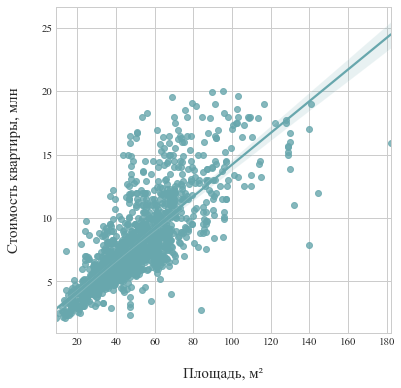

In [19]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.regplot(data=df,x='area',y='price', ax=ax, color='#68A7AD')
plt.title('')
plt.xlabel('\nПлощадь, м²', fontsize=15)
plt.ylabel('Стоимость квартиры, млн\n', fontsize=15)
ticks_y = tick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1_000_000))
ax.yaxis.set_major_formatter(ticks_x)
plt.show()

Из рисунка видно, что чем больше площадь квартиры, тем выше стоимость. 

Для более информативных выводов будем использовать цену за квадратный метр при исследовании взаимосвязей между зависимой и независимыми переменными.

## Исследование стоимости квадратного метра квартиры <a class="anchor" id="3"></a>

In [21]:
df['price_sq'] = df['price'] / df['area']

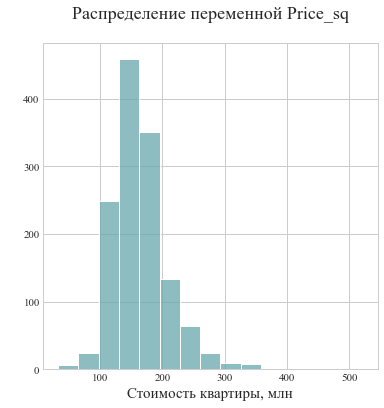

In [30]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.histplot(df['price_sq'], ax=ax, color='#68A7AD',bins=15)
plt.xlabel('Стоимость квартиры, млн', fontsize=15)
plt.ylabel('  ')
plt.title('Распределение переменной Price_sq\n', fontsize=18)
ticks_x = tick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1_000))
ax.xaxis.set_major_formatter(ticks_x)

In [26]:
df['price_sq'].describe().reset_index().round()

,index,price_sq
0,count,1331.0
1,mean,164744.0
2,std,45056.0
3,min,32777.0
4,25%,134996.0
5,50%,157783.0
6,75%,182909.0
7,max,521127.0


In [27]:
df['price_sq'].mode()

0    166666.666667
dtype: float64

Средняя стоимость квадратного метра равна 164 674, распределение скошено влево. Цена разнится от 32 тысяч до 520 тысяч.

## Взаимосвязи между стоимостью квадратного метра и остальными переменными <a class="anchor" id="4"></a>

In [31]:
cols = ['rooms', 'area', 'floor', 'lon', 'lat',
       'floors_in_house', 'building_year', 'wall_id', 'euro', 'mortgage',
       'ceiling_height', 'balcon_glass', 'lift', 'wate_heating_system',
       'furniture', 'internet', 'telephon', 'tv', 'regionLabel', 'keepLabel',
       'balconLabel', 'bathLabel', 'districttr_label', 'dist_centr']

In [34]:
corr_spear = pd.DataFrame(columns=['Название признака', 'Корреляция', 'p-value'])
for col in cols:
    new_row = {'Название признака':col, 'Корреляция':spearmanr(df[col],df['price_sq'])[0], 'p-value':spearmanr(df[col],df['price_sq'])[1]}
    corr_spear = corr_spear.append(new_row, ignore_index=True)

In [35]:
corr_spear

,Название признака,Корреляция,p-value
0,rooms,-0.344420,2.290231e-38
1,area,-0.341710,9.362038e-38
2,floor,0.203954,5.782123e-14
3,lon,-0.299681,5.056636e-29
4,lat,0.039632,1.484339e-01
5,floors_in_house,0.236192,2.486341e-18
6,building_year,0.099129,2.922860e-04
7,wall_id,0.023578,3.900660e-01
8,euro,0.172341,2.467700e-10
9,mortgage,0.012824,6.401808e-01


### Зависимость стоимости квадратного метра от количества комнат <a class="anchor" id="4.1"></a>

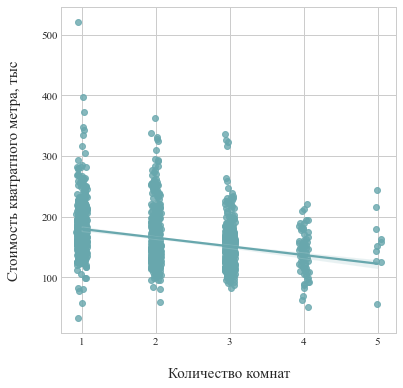

In [37]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.regplot(x=df['rooms'],y=df['price_sq'],x_jitter=0.07,ax=ax, color='#68A7AD')
plt.xlabel(' ')
plt.xlabel('\nКоличество комнат', fontsize=15)
plt.ylabel('Стоимость кватратного метра, тыс\n', fontsize=15)
ticks_y = tick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1_000))
ax.yaxis.set_major_formatter(ticks_y)
plt.show()

In [39]:
pg.kruskal(data = df, dv='price_sq', between='rooms')

,Source,ddof1,H,p-unc
Kruskal,rooms,4,162.220837,4.881925e-34


In [40]:
df.groupby('rooms')['price_sq'].mean().round()

rooms
1    181627.0
2    163999.0
3    149665.0
4    139537.0
5    156579.0
Name: price_sq, dtype: float64

Из рисунка и таблицы видно, стоимость квадратного метра снижается с возрастанием количества комнат в квартире, не считая 5-комнатные квартиры. Так как распределение целевой переменной не является нормальным, был проведен дисперсионный анализ для сравнения средних во всех группах квартир с разным количеством комнат с помощью непараметрического критерия Краскела-Уоллиса. 

### Зависимость стоимости квдратного метра от района <a class="anchor" id="4.2"></a>

In [43]:
price_reg = df.groupby('region')['price_sq'].mean().reset_index().sort_values('price_sq', ascending = False)

In [44]:
price_reg

,region,price_sq
0,Ленинский,176038.586267
4,Фрунзенский,170408.919044
3,Советский,160823.624228
2,Первореченский,156213.793574
1,Первомайский,152754.491776


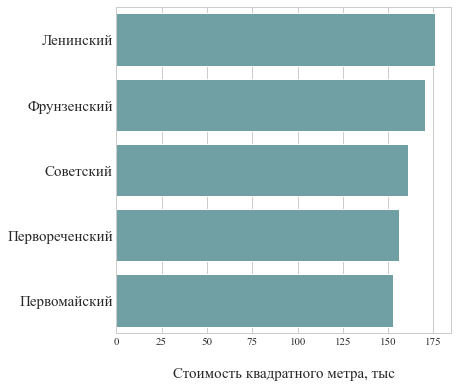

In [46]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.barplot(data=price_reg,x='price_sq',y='region',ax=ax, color='#68A7AD')
plt.xlabel('\nСтоимость квадратного метра, тыс', fontsize=15)
plt.ylabel('', fontsize=15)
ticks_x = tick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1_000))
ax.xaxis.set_major_formatter(ticks_x)
plt.yticks(fontsize=15)
#ax.set_yticklabels(labels=price_reg.region ,ha = 'left')
plt.show()

In [48]:
pg.kruskal(data = df, dv='price_sq', between='region')

,Source,ddof1,H,p-unc
Kruskal,region,4,65.725918,1.809352e-13


Из рисунка и таблицы, на уровне значимости 5% можно сделать вывод о том, что стоимость квадратного метра зависит от месторасположения объекта (нам позволяет это сделать непараметрический тест Краскела-Уоллиса, результаты которого представлены в таблице 11). Самым дорогим районом является Ленинский и Фрунзенский районы, самый дешевый – Первомайский. 

### Зависимость стоимости квадратного метра от этажа <a class="anchor" id="4.3"></a>

Сравним стоимость квадратного метра в зависимости от этажа объекта - первый, средний или последний этажи

In [51]:
df.columns

Index(['Unnamed: 0.1', 'price', 'rooms', 'area', 'floor', 'lon', 'lat',
       'floors_in_house', 'building_year', 'wall_id', 'euro', 'mortgage',
       'ceiling_height', 'balcon_glass', 'lift', 'wate_heating_system',
       'furniture', 'internet', 'telephon', 'tv', 'regionLabel', 'keepLabel',
       'balconLabel', 'bathLabel', 'districttr_label', 'dist_centr', 'region',
       'districttr', 'price_sq'],
      dtype='object')

In [56]:
def fun_floor(x):
    if x['floor'] == 1:
        return 'Первый'
    elif x['floor'] == x['floors_in_house']:
        return 'Последний'
    else:
        return 'Средний'
df['floor_str'] = df.apply(fun_floor, axis=1)
    

In [57]:
price_floor = df.groupby('floor_str')['price_sq'].mean().reset_index().sort_values('price_sq', ascending = True)

In [58]:
price_floor.round()

,floor_str,price_sq
0,Первый,150955.0
1,Последний,158324.0
2,Средний,168968.0


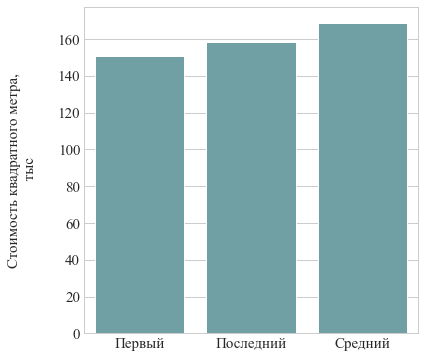

In [59]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.barplot(data=price_floor,y='price_sq',x='floor_str',ax=ax, color='#68A7AD')
plt.ylabel('Стоимость квадратного метра,\n тыс\n', fontsize=15)
plt.xlabel('', fontsize=15)
ticks_x = tick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1_000))
ax.yaxis.set_major_formatter(ticks_x)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#ax.set_yticklabels(labels=price_reg.region ,ha = 'left')
plt.show()

In [61]:
pg.kruskal(data = df, dv='price_sq', between='floor_str')

,Source,ddof1,H,p-unc
Kruskal,floor_str,2,50.20873,1.251160e-11


Стоимость квадратного метра квартир, находящихся на первом этаже, самая низкая (150 955), на среднем – самая высокая (168 989), на последнем – 158 324. Данные различия статистически значимы на уровне 1%, это доказывает непараметрический тест Краскела-Уоллиса, результаты которого представлены в таблице выше.

# `ВЫВОД`

    Переменная price имеет ненормальное распределение. В среднем квартира стоит 8,06 млн, чаще всего встречается цена 7 млн, а 75 % всех квартир стоит 9,8 млн или меньше. Размах стоимости квартиры 17,89 млн (от 2,1 млн до 19,99). Корреляция целевой переменной – `price` заметная и высокая (corr > 0.5) с такими независимыми переменными как  `rooms` – количество комнат в квартире (corr = 0.669), `area` – площадь квартиры (corr = 0.816).
    Средняя стоимость квадратного метра равна 164 674, распределение скошено влево. Цена разнится от 32 тысяч до 520 тысяч. Стоимость квадратного метра снижается с возрастанием количества комнат в квартире, не считая 5-комнатные квартиры. Самым дорогим районом является Ленинский и Фрунзенский районы, самый дешевый – Первомайский. Стоимость квадратного метра квартир, находящихся на первом этаже, самая низкая (150 955), на среднем – самая высокая (168 989), на последнем – 158 324.